In [17]:
import math
import numpy
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd

In [18]:
sr = 22050 # sample rate
T = 2.0    # seconds
f = 110    # 110 Hz
# time variable
t = numpy.linspace(0, T, int(T*sr), endpoint=False)
#wave = 0.5*numpy.sin(2 * numpy.pi * f * t)
wave = signal.sawtooth(2 * numpy.pi * f * t)

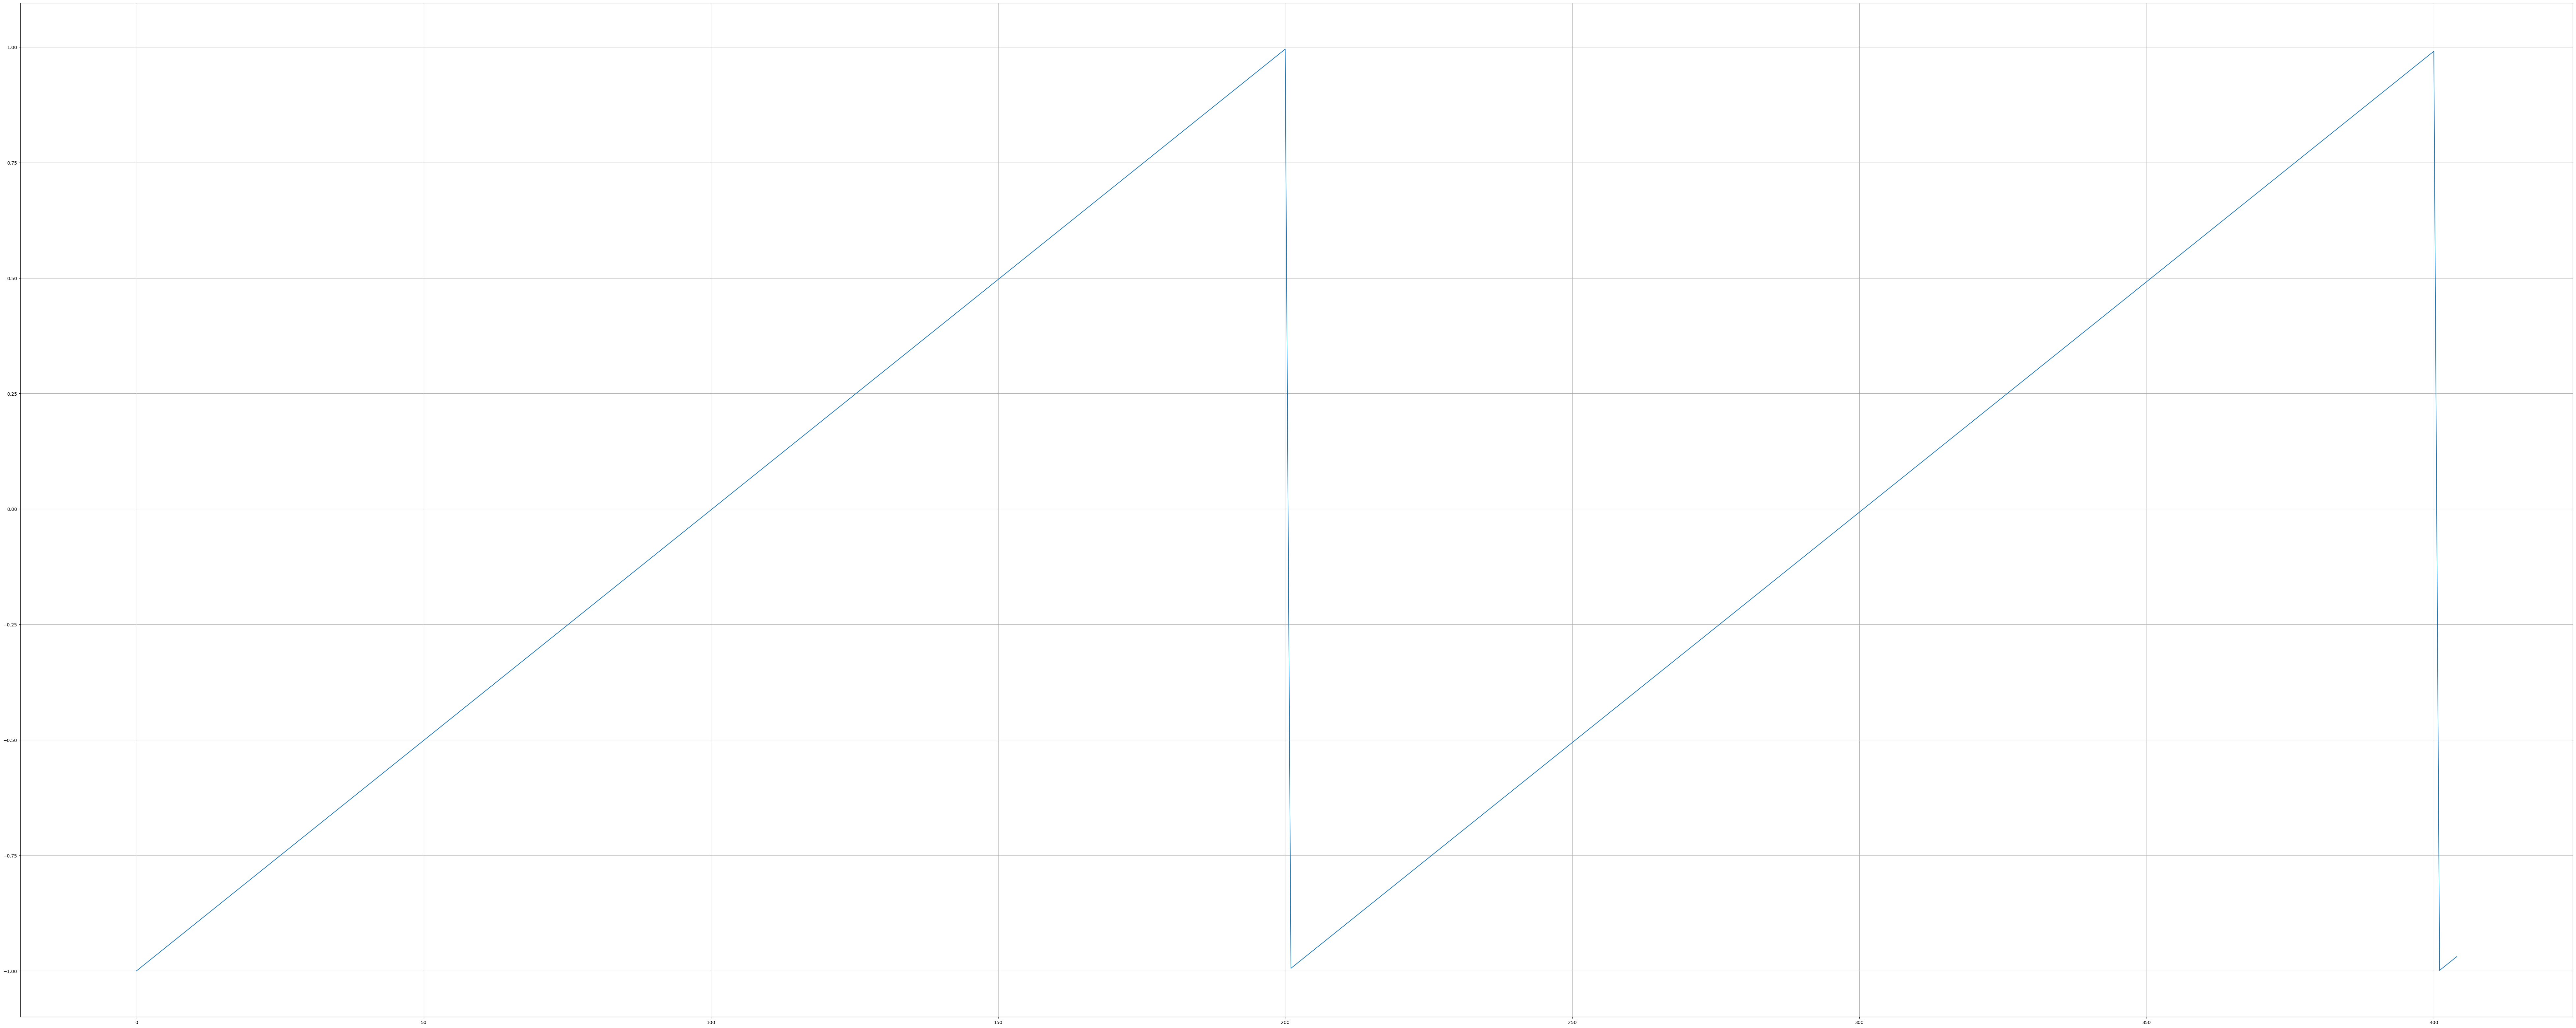

In [27]:
plt.figure(figsize=(100, 40))
plt.plot(wave[:405])
plt.grid()
plt.show()

In [20]:
ipd.Audio(wave, rate=sr) # load a NumPy array

In [75]:
low_threshold = 0.3
low_fc = 3.0
high_threshold = 0.8
high_fc = 0.5
makeup_gain = 1.0
enable_makeup_gain = True

if enable_makeup_gain:
    # Compensate for high gain. Since we compress the peaks, we can overall increase loudness.
    peak = high_threshold + (1.0 - high_threshold) * high_fc;
    makeup_gain /= peak;

def saturate(x):
    v = math.fabs(x)
    
    if v < low_threshold:
        # at low_threshold: gain == 1.0
        # at           0.0: gain == low_fc
        dg = 1.0 - (1.0 / low_fc)      # 1.0 - 1/3 ~ =.6667
        rng = low_threshold            # 0.2
        #w = (low_threshold - v) / rng  # v=0.0: 1.0,  v=thr: 0.0
        # v = v * (1.0 + (w * dg))       # this makes a nasty bump for large values of low_gain
        v_rel = low_threshold - v
        w = v_rel / rng
        v = low_threshold - v_rel * (1.0 - (w * dg))
    elif v > high_threshold:
        # at high_threshold: gain == 1.0
        # at            1.0: gain = high_gain
        dg = 1.0 - high_fc
        rng = 1.0 - high_threshold
        v_rel = (v - high_threshold)
        w = v_rel / rng
        v = high_threshold + v_rel * (1.0 - (w * dg))

    v = v * makeup_gain
    return math.copysign(v,x)

v_saturate = numpy.vectorize(saturate)
d_wave = v_saturate(wave)

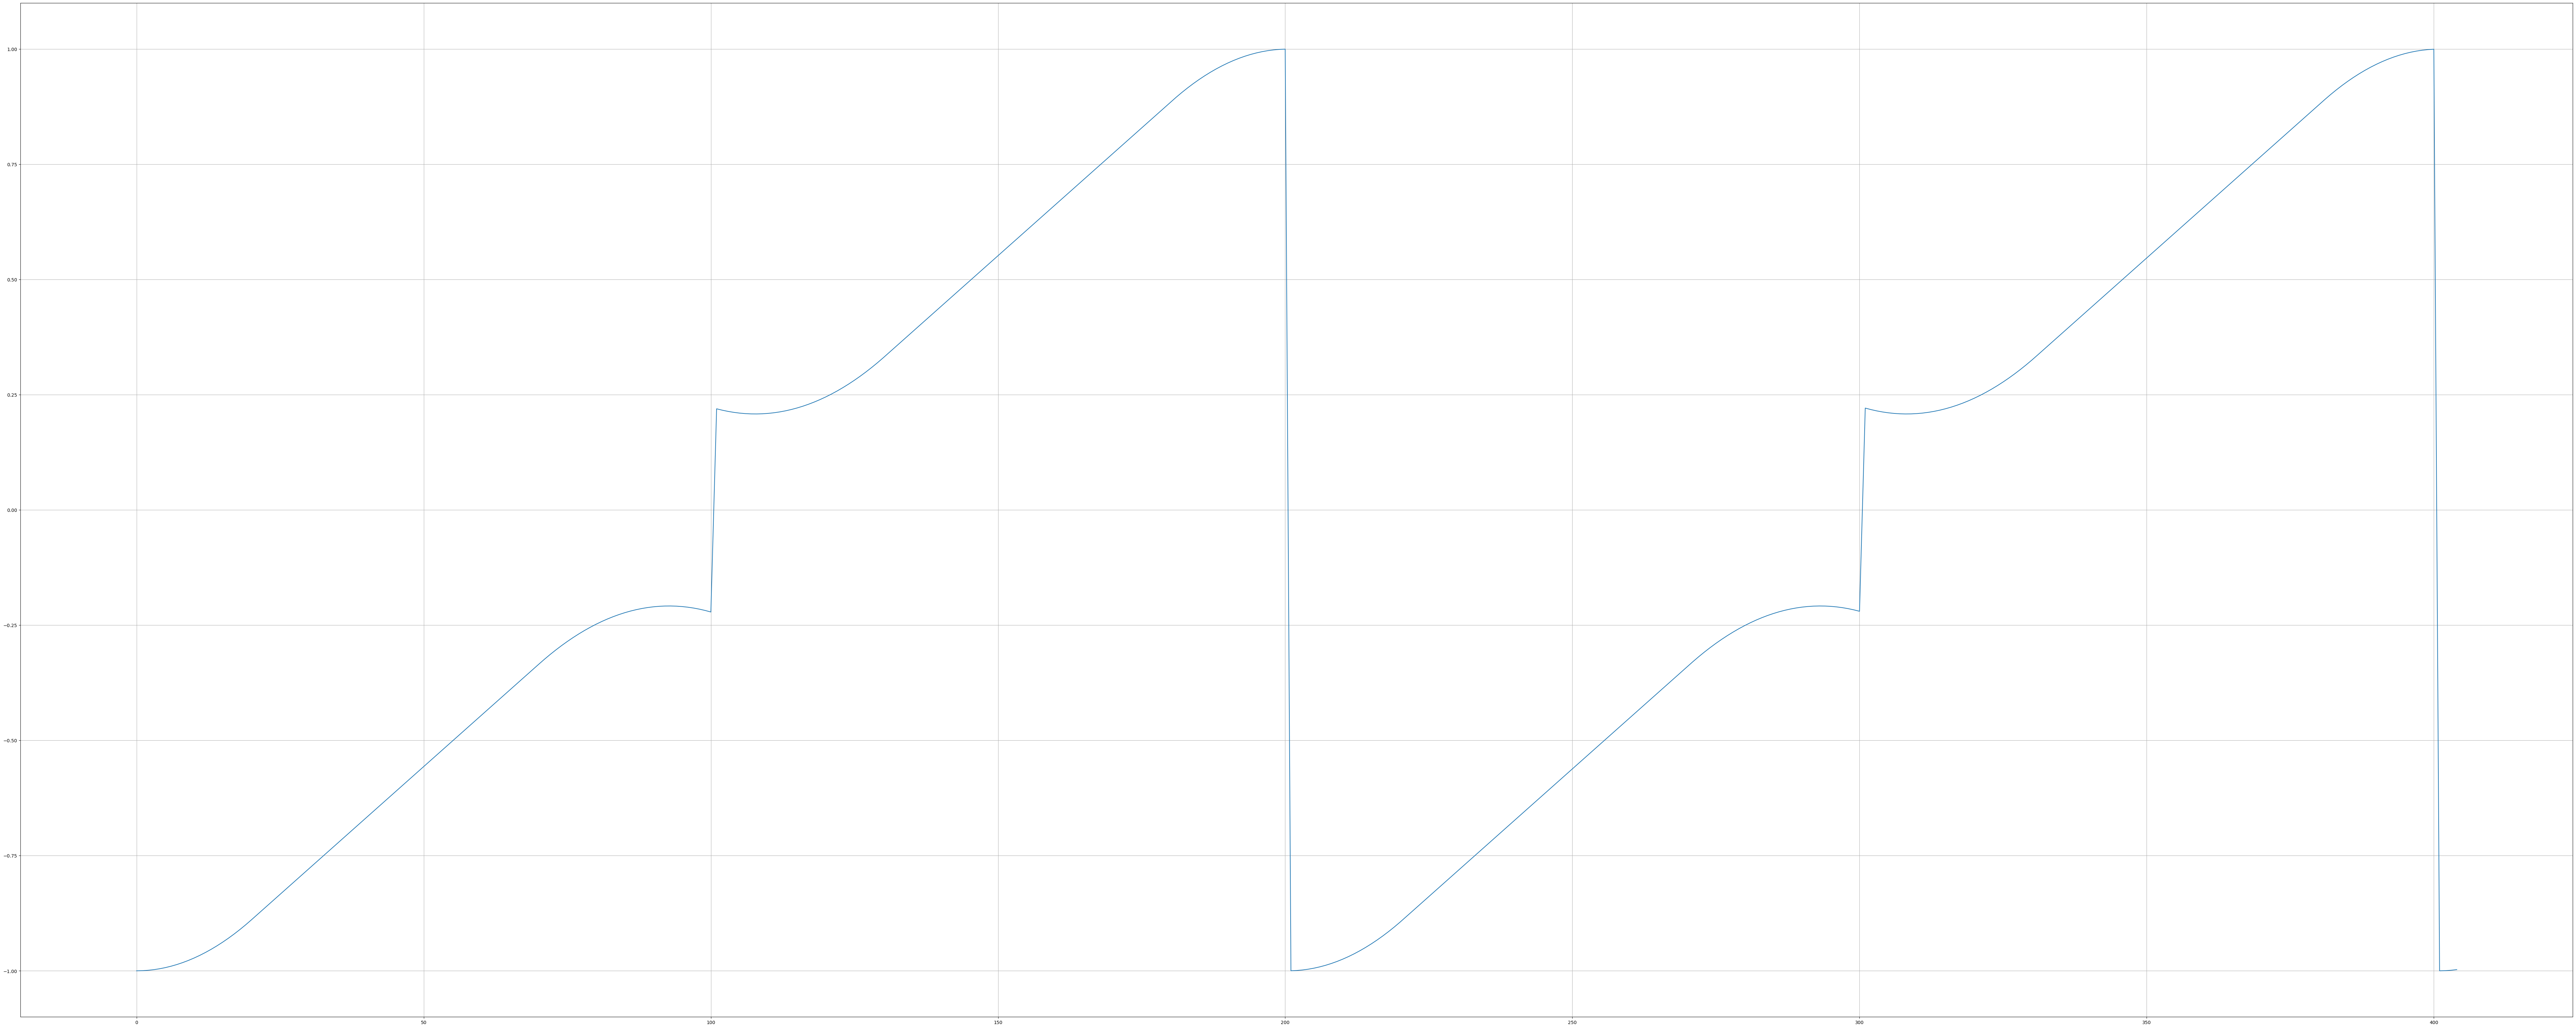

In [76]:
plt.figure(figsize=(100, 40))
plt.plot(d_wave[:405])
plt.grid()
plt.show()

In [77]:
ipd.Audio(d_wave, rate=sr) # load a NumPy array